In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression

# Task 3.1 - Data selection and wrangling 

In [5]:
df = pd.read_pickle("data/interim/task2_data_processed.pkl")
df_linear = pd.read_pickle("data/interim/task2_data_processed.pkl")

### Categorizing age into periods 

Period of Death
Before 2000       165
2000 and After    145
Name: count, dtype: int64


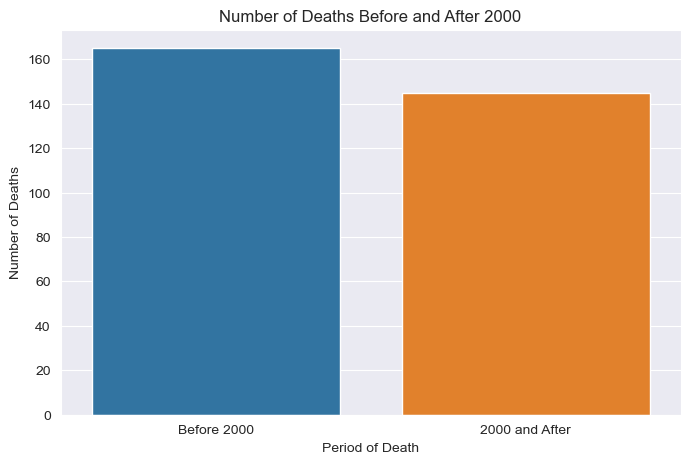

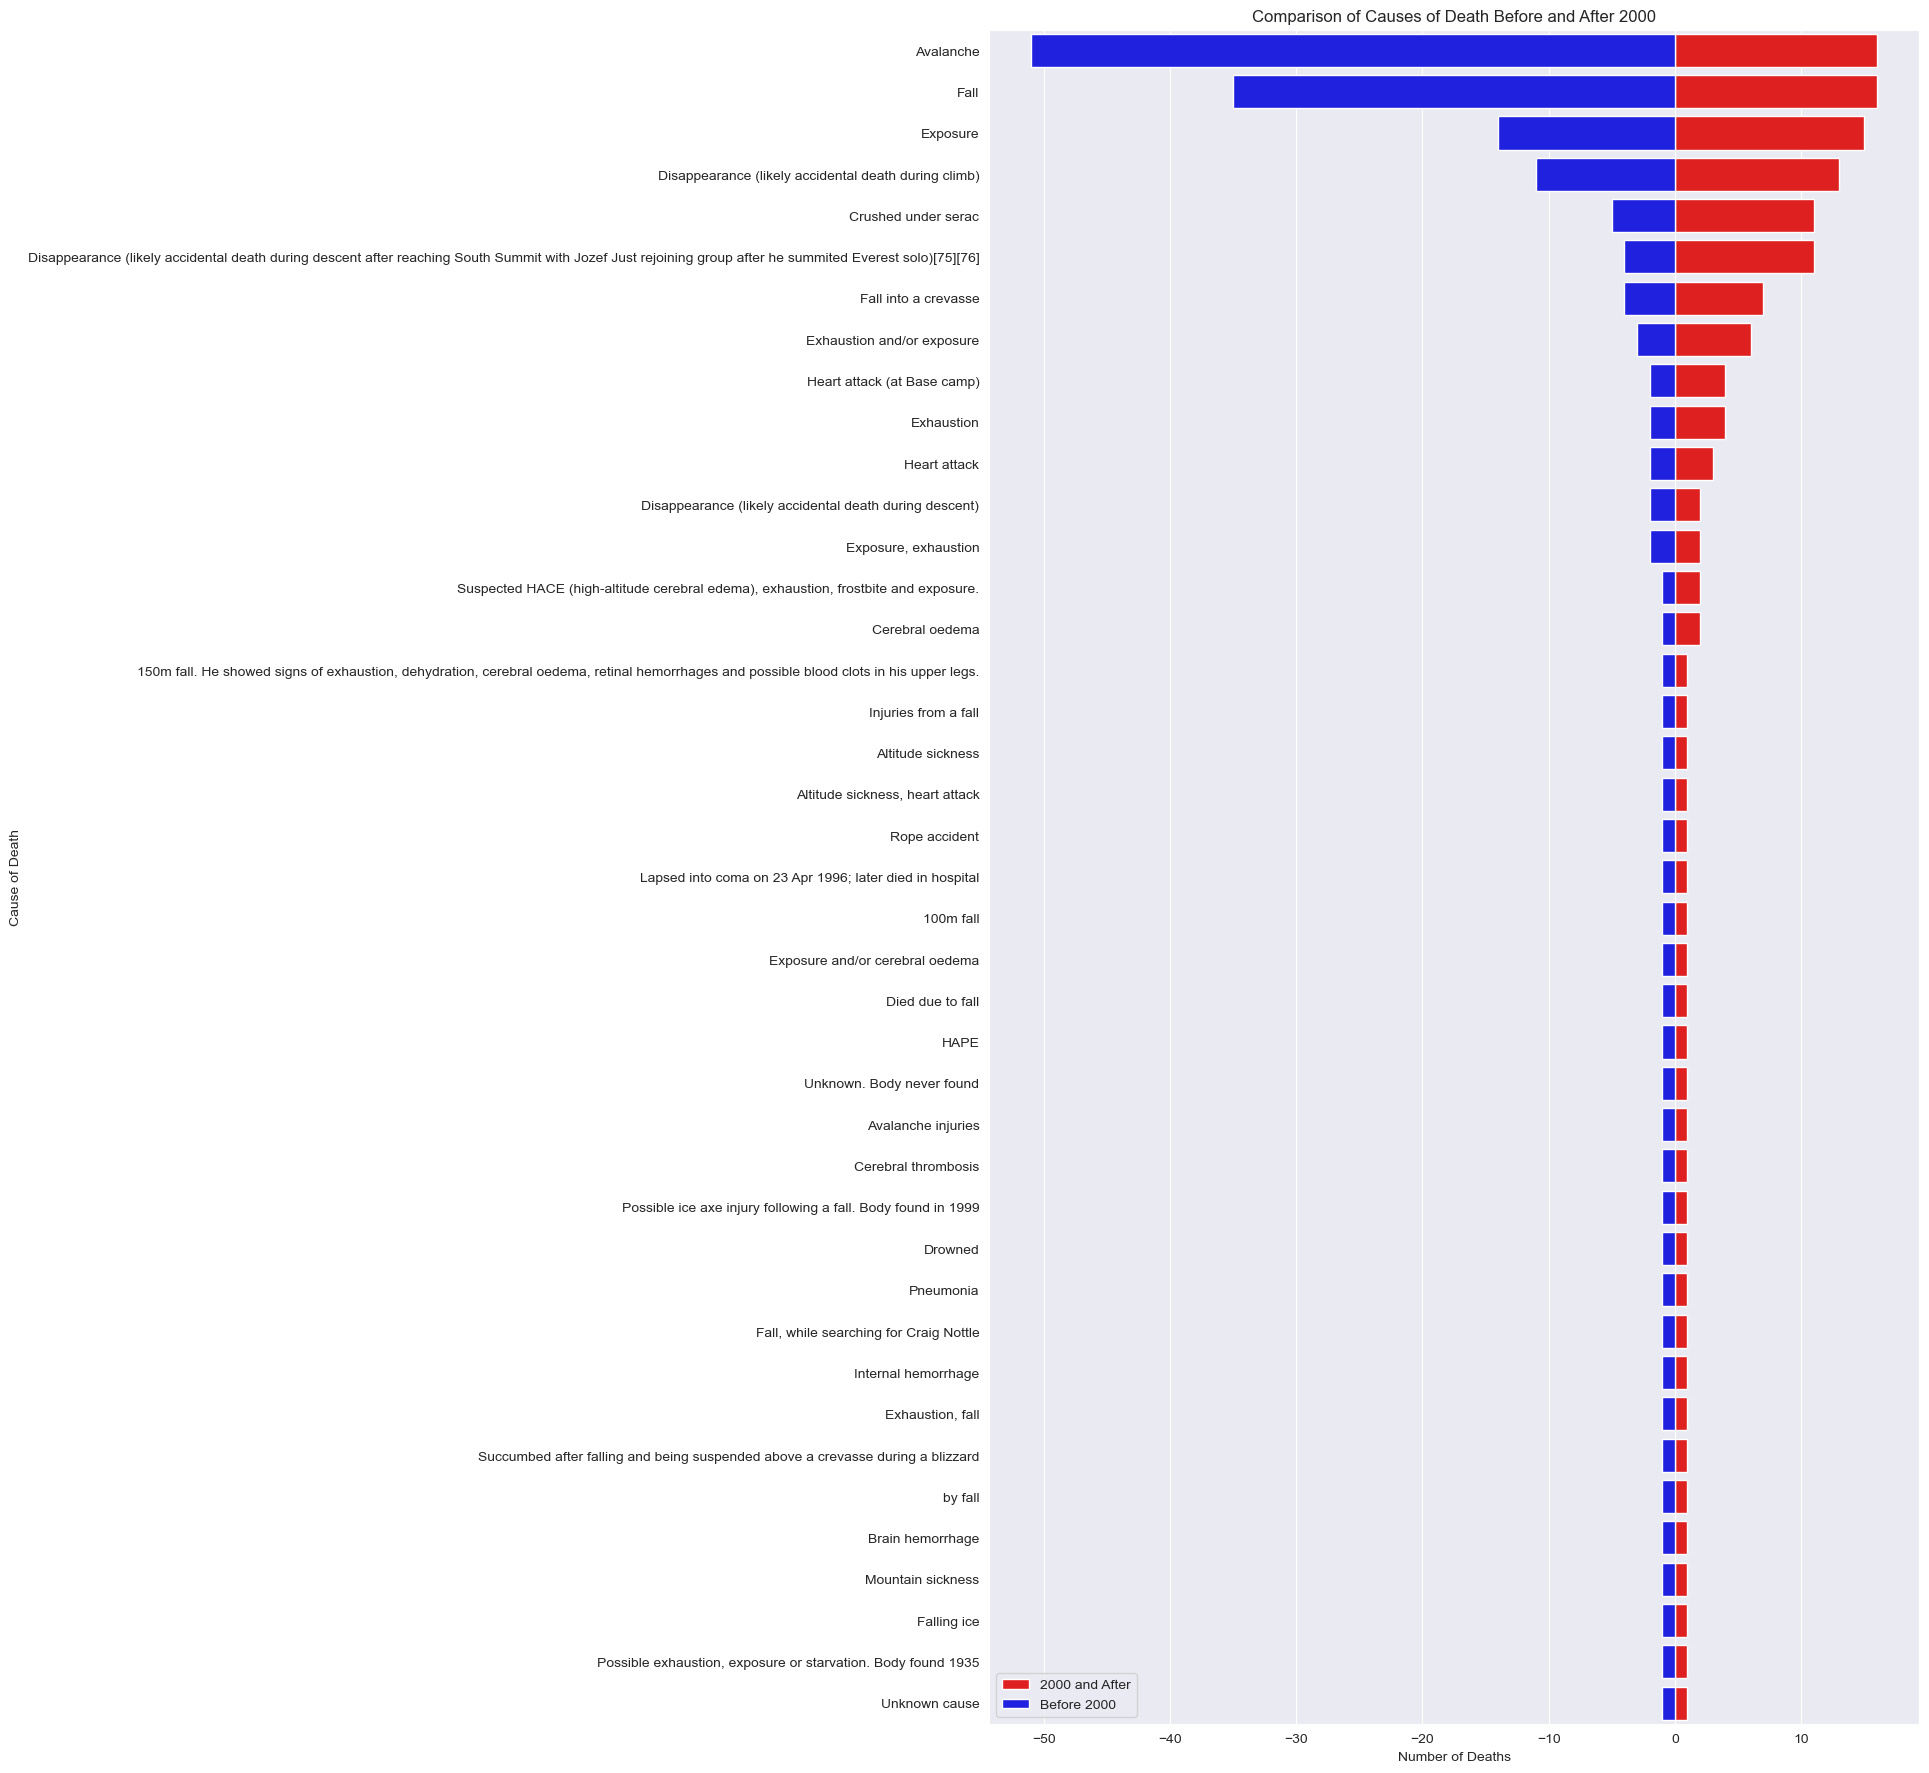

In [6]:
# Extracting the year
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

df["Year"] = df["Date"].dt.year

# Categorizing data into periods
df["Period of Death"] = np.where(df["Year"] < 2000, "Before 2000", "2000 and After")

# Count the frequency of deaths in each period
death_count_by_period = df["Period of Death"].value_counts()
print(death_count_by_period)

plt.figure(figsize=(8, 5))
sns.countplot(x="Period of Death", data=df)
plt.title("Number of Deaths Before and After 2000")
plt.xlabel("Period of Death")
plt.ylabel("Number of Deaths")
plt.savefig("./figures/number_of_deaths_before_2000_and_after.png")
plt.show()


# Creating dataframe for before and after 2000
deaths_before_2000 = df[df["Year"] < 2000]
deaths_after_2000 = df[df["Year"] >= 2000]

# Counting the Causes of Deaths for each period
cod_before_2000 = deaths_before_2000["Cause of death"].value_counts()
cod_after_2000 = deaths_after_2000["Cause of death"].value_counts()

plt.figure(figsize=(12, 22))
sns.barplot(
    x=cod_after_2000.values, y=cod_after_2000.index, color="r", label="2000 and After"
)
sns.barplot(
    x=-cod_before_2000.values, y=cod_before_2000.index, color="b", label="Before 2000"
)

plt.title("Comparison of Causes of Death Before and After 2000")
plt.xlabel("Number of Deaths")
plt.ylabel("Cause of Death")
plt.legend()
plt.savefig("./figures/comparison_of_cod_before_and_after_2000.png")
plt.show()

### Linear regression - trying to predict number of incidents in the upcoming years

In [8]:
df_linear['Year'] = pd.to_datetime(df_linear['Date']).dt.year
yearly_incidents = df_linear.groupby('Year').size().reset_index(name='Incidents')

X = yearly_incidents['Year'].values.reshape(-1, 1)
y = yearly_incidents['Incidents']

model = LinearRegression()
model.fit(X, y)

future_years = np.array(range(int(X.max()) + 1, int(X.max()) + 11)).reshape(-1, 1)
future_predictions = model.predict(future_years)

predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Incidents': future_predictions})

print(predictions_df)

   Year  Predicted Incidents
0  2022             7.717763
1  2023             7.791788
2  2024             7.865814
3  2025             7.939839
4  2026             8.013864
5  2027             8.087889
6  2028             8.161915
7  2029             8.235940
8  2030             8.309965
9  2031             8.383991


# 3.2 Data Analysis

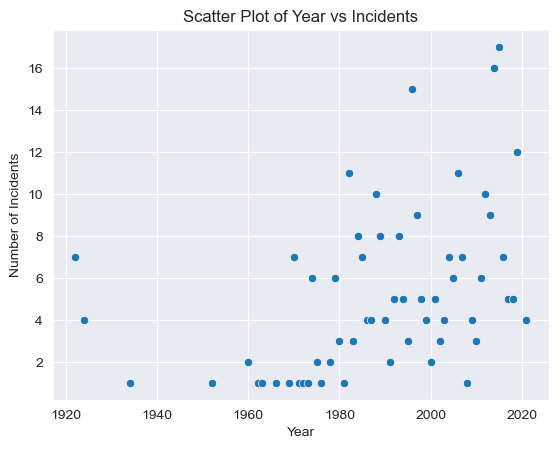

C:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


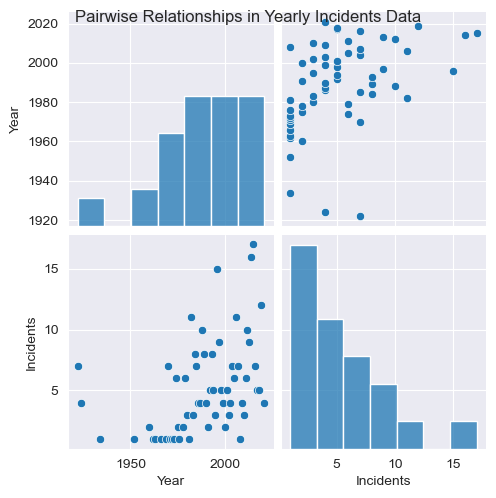

In [9]:
sns.scatterplot(data=yearly_incidents, x='Year', y='Incidents')
plt.title('Scatter Plot of Year vs Incidents')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

sns.pairplot(yearly_incidents)
plt.suptitle('Pairwise Relationships in Yearly Incidents Data', verticalalignment='top')
plt.show()

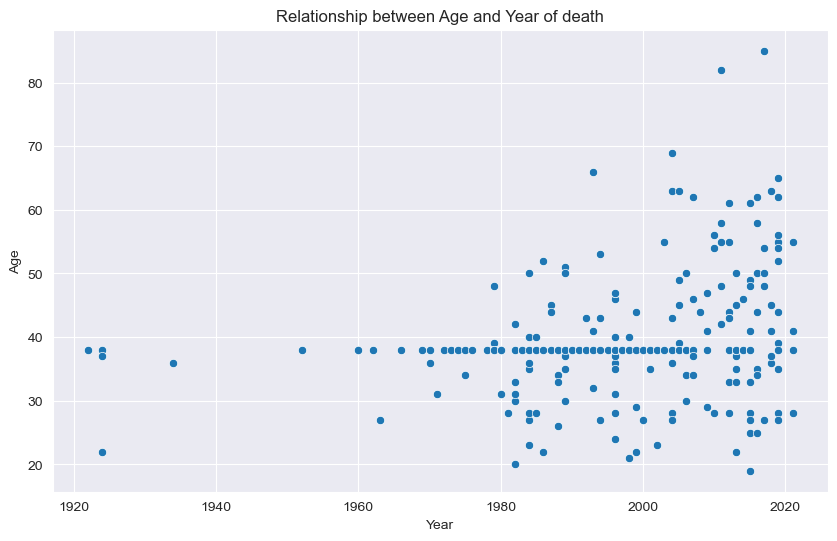

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Year", y="Age", data=df)
plt.title("Relationship between Age and Year of death")
plt.xlabel("Year")
plt.ylabel("Age")
plt.grid(True)
plt.savefig("./figures/relation_btw_age_and_year.png")
plt.show()

# 3.3 Insights
#### This task is described in our report 